In [58]:
import pandas as pd
import matplotlib.pyplot as plt
import re

In [59]:
def parse_file(lines):
    data = [parse_line(line, idx) for idx, line in enumerate(lines) if line.strip()]
    return pd.DataFrame(data)

In [60]:
def parse_line(line, idx):
    if line.startswith("Iteration"):
        parts = line.split(":")
        iteration = int(parts[1].replace(" ", ""))
        time = int(parts[2].split(" ")[1])
        
        return {
            'iteration': iteration,
            'time': time
        }
    
    parts = line.split(":")
    service = parts[0].strip()
    metrics = parts[1].split("|")
    
    cpu = float(metrics[0].split(" ")[2].replace("%", ""))
    
    mem_used = metrics[1].split(" ")[2]
    mem_total = metrics[1].split(" ")[4]
    net_used = metrics[2].split(" ")[2]
    net_total = metrics[2].split(" ")[4]
    block = metrics[3].split(" ")[2]
    
    mem_used_bytes = convert_to_bytes(mem_used)
    mem_total_bytes = convert_to_bytes(mem_total)
    net_used_bytes = convert_to_bytes(net_used)
    net_total_bytes = convert_to_bytes(net_total)
    block_bytes = convert_to_bytes(block)
    
    mem_used_mb = mem_used_bytes / (1000 * 1000)
    mem_total_mb = mem_total_bytes / (1000 * 1000)
    
    return {
        'unit': idx,
        'service': service,
        'cpu': cpu,
        'mem_used': mem_used_mb,
        'mem_total': mem_total_mb,
        'net_used': net_used_bytes,
        'net_total': net_total_bytes,
        'block_used': net_used_bytes,
        'block_total': block_bytes
    }

In [61]:
def convert_to_bytes(value: str) -> int:
    units = {
        'B': 1,
        'kB': 1000,
        'MB': 1000 * 1000,
        'MiB': 1024 * 1024,
        'GB': 1000 * 1000 * 1000,
        'GiB': 1024 * 1024 * 1024,
        'KiB': 1024,
    }
    match = re.match(r"([\d.]+)([a-zA-Z]+)", value.strip())
    if match:
        number = float(match.group(1))
        unit = match.group(2)
        if unit in units:
            return int(number * units[unit])
        else:
            print(f"Unknown unit: {unit}, value: {value}")
    return 0

In [62]:
def calculate_aggregates(df):
    grouped = df.groupby('service')

    aggregates = []

    for service, group in grouped:
        max_cpu = group['cpu'].max()
        max_mem = group['mem_used'].max()
        avg_cpu = group['cpu'].mean()
        avg_mem = group['mem_used'].mean()
        avg_net = group['net_used'].mean()
        avg_block = group['block_used'].mean()

        aggregates.append({
            'Service': service,
            'Avg CPU (%)': avg_cpu,
            'Max CPU (%)': max_cpu,
            'Avg Mem (MB)': avg_mem,
            'Max Mem (MB)': max_mem,
            'Avg Net (kB)': avg_net,
            'Avg Block (B)': avg_block
        })

    return pd.DataFrame(aggregates)

In [63]:
def print_time_results(df):
    iteration_rows = df[df['iteration'].notnull()]
    
    if iteration_rows.empty:
        print("No iteration data found.")
        return

    iteration_times = iteration_rows['time'].tolist()
    avg_time = sum(iteration_times) / len(iteration_times)

    headers = [f"Iteration {i}" for i in range(1, len(iteration_times) + 1)] + ["Average"]
    values = iteration_times + [f"{avg_time:.2f}"]

    col_width = max(len(header) for header in headers) + 2
    formatted_headers = " | ".join(header.ljust(col_width) for header in headers)
    formatted_values = " | ".join(str(value).ljust(col_width) for value in values)

    print(formatted_headers)
    print(formatted_values)

In [64]:
def plot_metrics_over_time(df):
    plt.figure(figsize=(12, 8))
    
    plt.subplot(2, 2, 1)
    for service in df['service'].unique():
        service_df = df[df['service'] == service]
        plt.plot(service_df['unit'], service_df['cpu'], label=service)
    plt.title('CPU Usage (%) Over Time')
    plt.xlabel('Time (Unit)')
    plt.ylabel('CPU (%)')
    plt.legend()

    plt.subplot(2, 2, 2)
    for service in df['service'].unique():
        service_df = df[df['service'] == service]
        plt.plot(service_df['unit'], service_df['mem_used'], label=service)
    plt.title('Memory Usage (MB) Over Time')
    plt.xlabel('Time (Unit)')
    plt.ylabel('Memory (MB)')
    plt.legend()

    plt.subplot(2, 2, 3)
    for service in df['service'].unique():
        service_df = df[df['service'] == service]
        plt.plot(service_df['unit'], service_df['net_used'], label=service)
    plt.title('Network Usage (kB) Over Time')
    plt.xlabel('Time (Unit)')
    plt.ylabel('Network (kB)')
    plt.legend()

    plt.subplot(2, 2, 4)
    for service in df['service'].unique():
        service_df = df[df['service'] == service]
        plt.plot(service_df['unit'], service_df['block_used'], label=service)
    plt.title('Block Usage (B) Over Time')
    plt.xlabel('Time (Unit)')
    plt.ylabel('Block (B)')
    plt.legend()

    plt.tight_layout()
    plt.show()

In [65]:
# TODO: Change this to the directory where the results are stored
results_dir = "results"

In [66]:
preprocessing = "preprocessing"
_import = "import"
largestNumberOfChildren = "largestNumberOfChildren"
neighborhoodPopularity = "neighborhoodPopularity"
shortestPathPopularity = "shortestPathPopularity"
directPathWithHighPopularity = "directPathWithHighPopularity"

In [67]:
# TODO: Add the files you want to analyze
files = [preprocessing, _import, largestNumberOfChildren, neighborhoodPopularity, shortestPathPopularity, directPathWithHighPopularity]
files = [f"{results_dir}/{file}" for file in files]

Metrics for results/preprocessing

                Service  Avg CPU (%)  Max CPU (%)  Avg Mem (MB)  Max Mem (MB)  Avg Net (kB)  Avg Block (B)
     adv-db-systems.app     0.000000         0.00      0.401408      0.401408   1400.000000    1400.000000
adv-db-systems.importer    43.318919        80.81     13.778014     21.590179   1660.000000    1660.000000
               arangodb     0.482432         0.65    339.942671    343.094067   7703.513514    7703.513514

Iteration 1   | Average      
5716.0        | 5716.00      


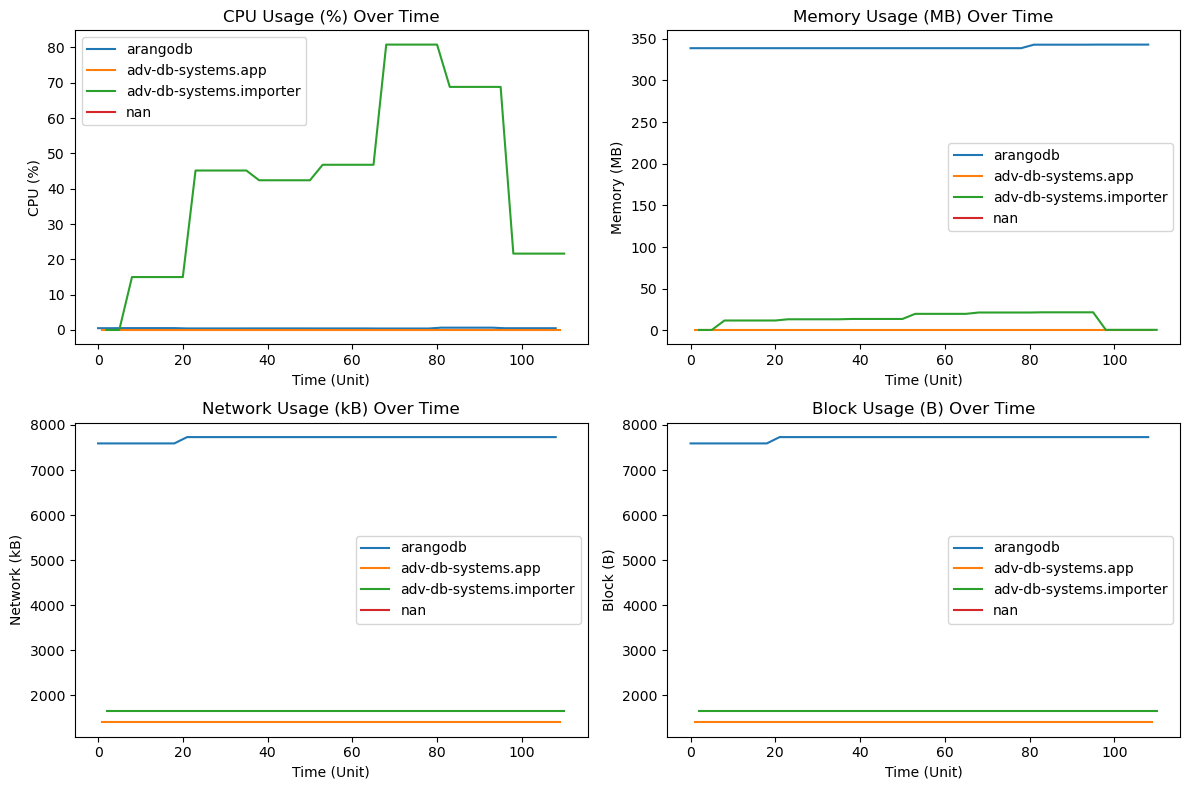

Unknown unit: e, value: 1e+03MB
Unknown unit: e, value: 1e+03MB
Unknown unit: e, value: 1e+03MB
Unknown unit: e, value: 1e+03MB
Unknown unit: e, value: 1e+03MB
Unknown unit: e, value: 1e+03MB
Unknown unit: e, value: 1e+03MB
Unknown unit: e, value: 1e+03MB
Unknown unit: e, value: 1e+03MB
Unknown unit: e, value: 1e+03MB
Metrics for results/import

                Service  Avg CPU (%)  Max CPU (%)  Avg Mem (MB)  Max Mem (MB)  Avg Net (kB)  Avg Block (B)
     adv-db-systems.app     0.000000         0.00      0.401408      0.401408  1.438629e+03   1.438629e+03
adv-db-systems.importer   215.791189       432.26   1616.012332   1926.292832  2.922904e+09   2.922904e+09
               arangodb   419.368869       636.31   2337.014821   4278.861168  1.775506e+09   1.775506e+09

Iteration 1   | Average      
706410.0      | 706410.00    


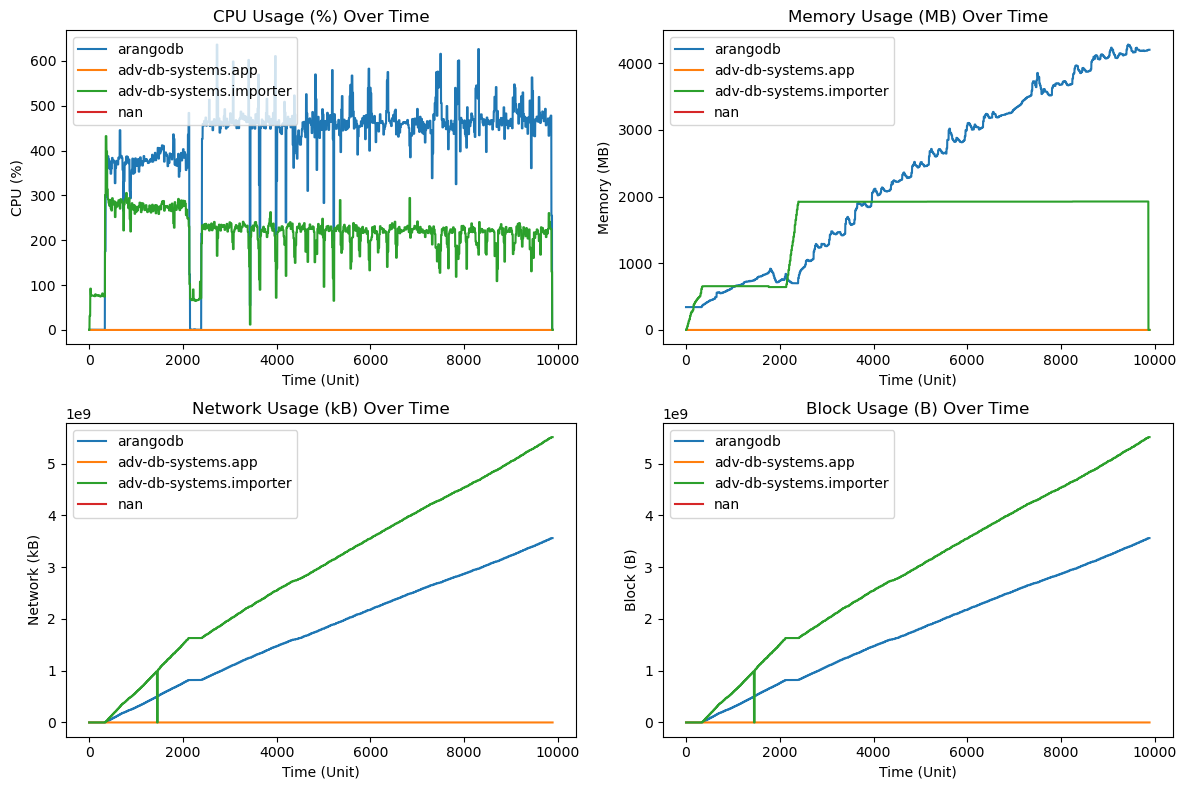

Metrics for results/largestNumberOfChildren

                Service  Avg CPU (%)  Max CPU (%)  Avg Mem (MB)  Max Mem (MB)  Avg Net (kB)  Avg Block (B)
     adv-db-systems.app     1.665052        25.42     16.489129     19.262341  5.133876e+03   5.133876e+03
adv-db-systems.importer     0.000000         0.00      0.547141      0.548864  5.510000e+09   5.510000e+09
               arangodb    92.004742       120.49   5017.192613   5395.552665  3.560000e+09   3.560000e+09

Iteration 1   | Iteration 2   | Iteration 3   | Iteration 4   | Iteration 5   | Average      
61948.0       | 7445.0        | 7224.0        | 7250.0        | 7874.0        | 18348.20     


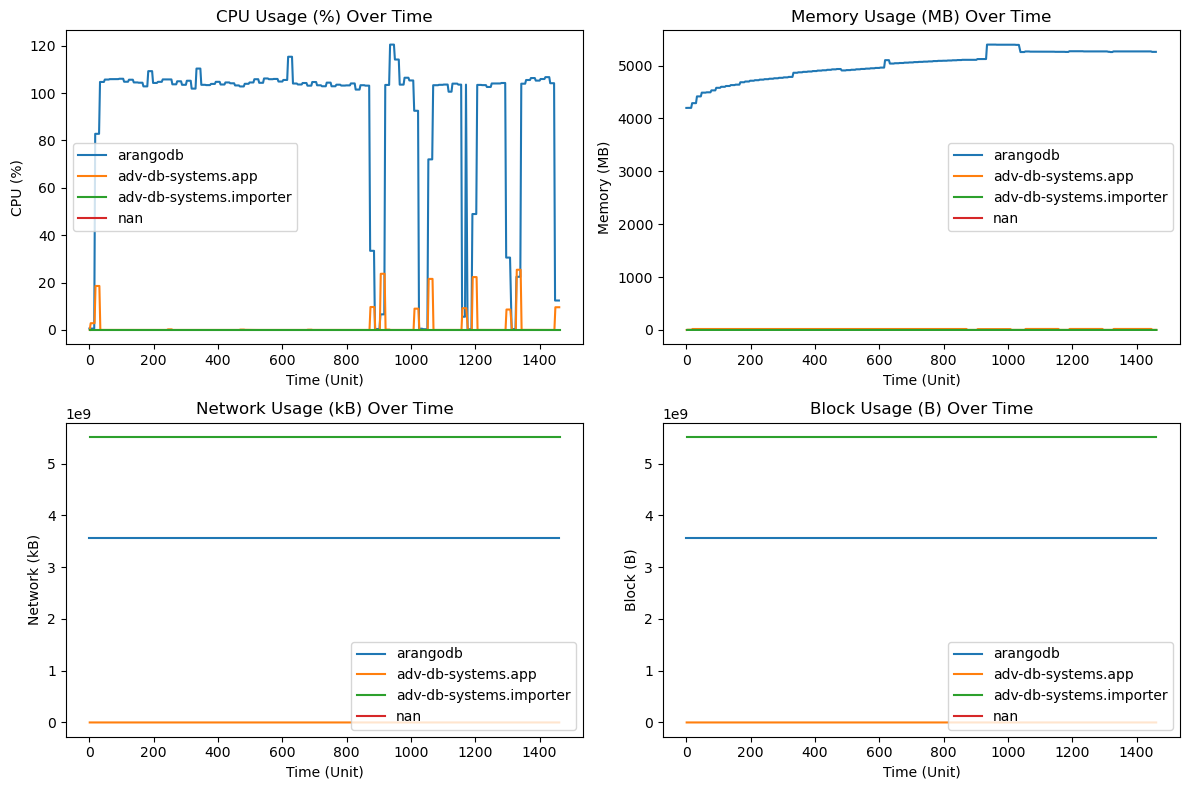

Metrics for results/neighborhoodPopularity

                Service  Avg CPU (%)  Max CPU (%)  Avg Mem (MB)  Max Mem (MB)  Avg Net (kB)  Avg Block (B)
     adv-db-systems.app    10.526974        23.02      6.860418     19.157483  2.161974e+04   2.161974e+04
adv-db-systems.importer     0.000000         0.00      0.544768      0.544768  5.510000e+09   5.510000e+09
               arangodb    16.016974        48.37   5253.310130   5255.966228  3.560000e+09   3.560000e+09

Iteration 1   | Iteration 2   | Iteration 3   | Iteration 4   | Iteration 5   | Average      
1033.0        | 863.0         | 864.0         | 929.0         | 892.0         | 916.20       


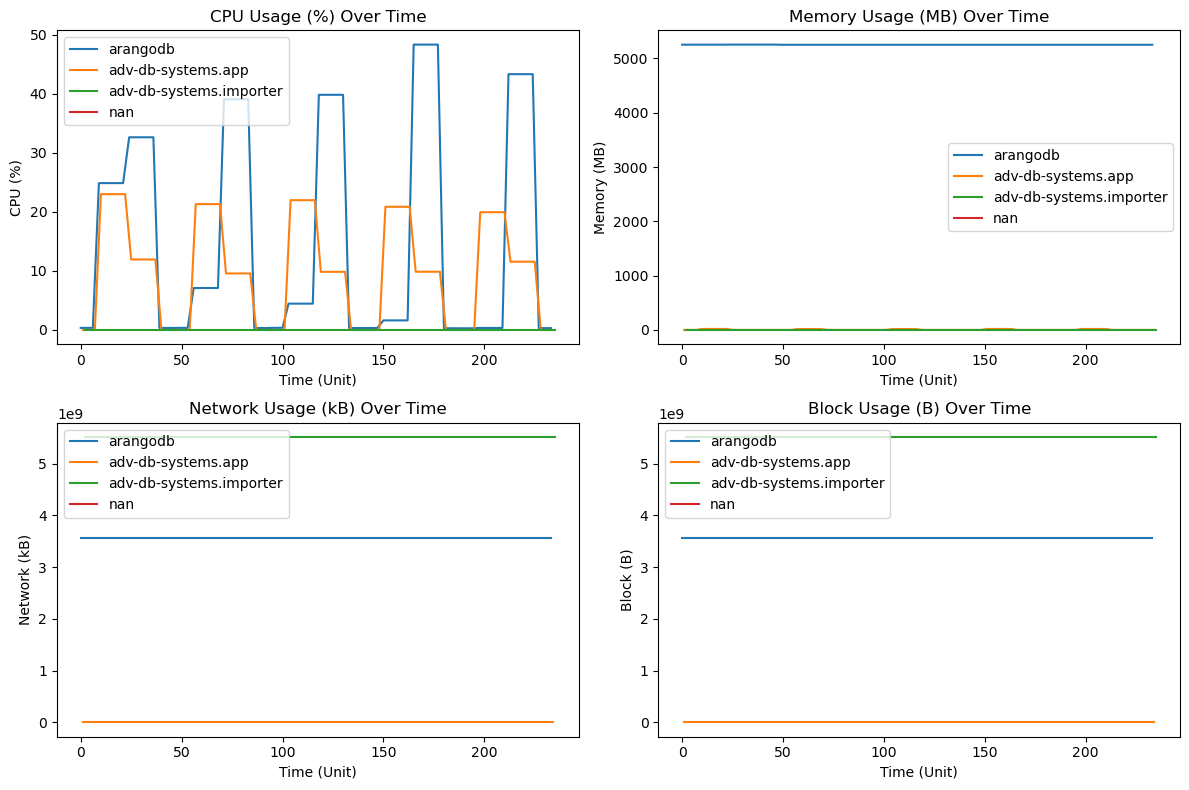

Metrics for results/shortestPathPopularity

                Service  Avg CPU (%)  Max CPU (%)  Avg Mem (MB)  Max Mem (MB)  Avg Net (kB)  Avg Block (B)
     adv-db-systems.app    10.207857        29.05      5.228110     19.157483  2.799143e+04   2.799143e+04
adv-db-systems.importer     0.000000         0.00      0.544768      0.544768  5.510000e+09   5.510000e+09
               arangodb    11.211143        32.31   5252.745003   5252.745003  3.560000e+09   3.560000e+09

Iteration 1   | Iteration 2   | Iteration 3   | Iteration 4   | Iteration 5   | Average      
725.0         | 721.0         | 768.0         | 671.0         | 774.0         | 731.80       


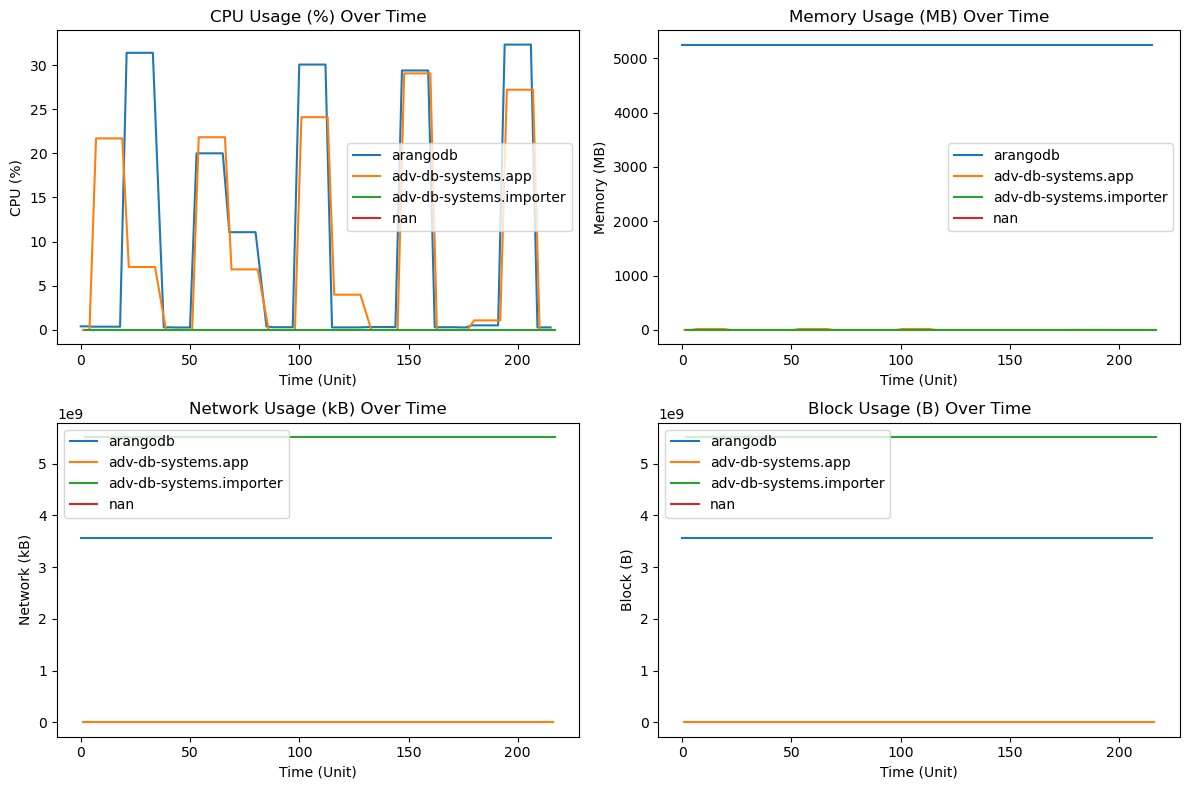

Metrics for results/directPathWithHighPopularity

                Service  Avg CPU (%)  Max CPU (%)  Avg Mem (MB)  Max Mem (MB)  Avg Net (kB)  Avg Block (B)
     adv-db-systems.app     9.385976        24.38      6.535441     21.086863  4.406220e+04   4.406220e+04
adv-db-systems.importer     0.000000         0.00      0.544768      0.544768  5.510000e+09   5.510000e+09
               arangodb    25.036220        93.79   5311.931747   5322.538221  3.560000e+09   3.560000e+09

Iteration 1   | Iteration 2   | Iteration 3   | Iteration 4   | Iteration 5   | Average      
1499.0        | 1169.0        | 1191.0        | 1222.0        | 1181.0        | 1252.40      


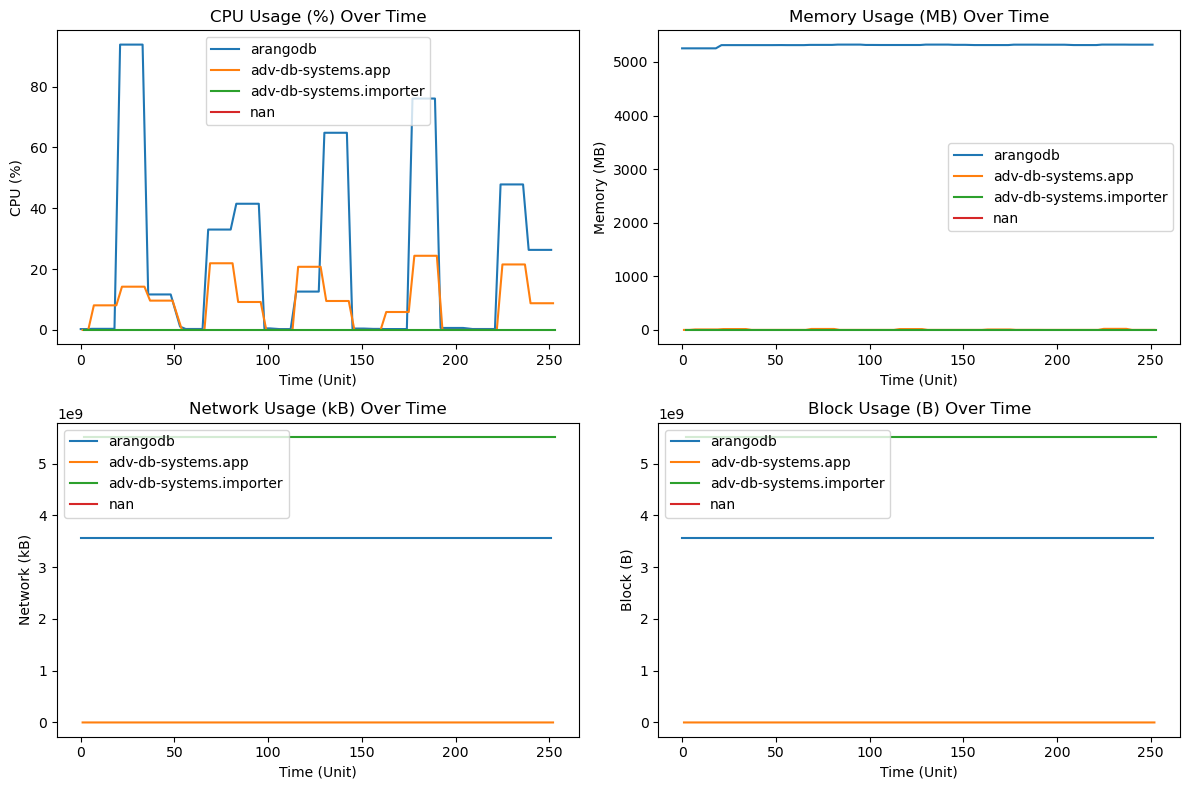

In [68]:
for file in files:
    with open(f"{file}") as f:
        lines = f.readlines()
        df = parse_file(lines)
        
        print(f"Metrics for {file}")
        print()
        
        result_df = calculate_aggregates(df)
        print(result_df.to_string(index=False))
        
        print()
        
        print_time_results(df)
        plot_metrics_over_time(df)